In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv("avitoFinal1_cleaned.csv")

In [2]:
df.head()

# df.isna().sum()

,Unnamed: 0,Année,Transmission,Carburant,Kilométrage,Marque,Modèle,Nombre de portes,Origine,Première main,Puissance fiscale,État,Prix
0,0,2011,4,0,164999.5,61,456,5,3,1,8.0,6,115000.000
1,1,2013,4,2,194999.5,57,430,5,0,0,9.0,6,75000.000
2,2,2003,4,0,224999.5,13,670,3,0,1,7.0,0,48000.000
3,3,2012,4,2,174999.5,23,297,5,0,0,7.0,0,75200.000
4,4,2021,4,0,82499.5,13,144,5,3,0,6.0,3,132729.805


In [2]:
df=df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.head()

,Année,Transmission,Carburant,Kilométrage,Marque,Modèle,Nombre de portes,Origine,Première main,Puissance fiscale,État,Prix
0,2011,4,0,164999.5,61,456,5,3,1,8.0,6,115000.000
1,2013,4,2,194999.5,57,430,5,0,0,9.0,6,75000.000
2,2003,4,0,224999.5,13,670,3,0,1,7.0,0,48000.000
3,2012,4,2,174999.5,23,297,5,0,0,7.0,0,75200.000
4,2021,4,0,82499.5,13,144,5,3,0,6.0,3,132729.805


In [5]:
# from sklearn.preprocessing import LabelEncoder
# # convertir les variables catégoriques en variables numériques
# LE=LabelEncoder()
# LE.fit(df["Marque"])
# df["Marque"]=LE.transform(df["Marque"])

# LE1=LabelEncoder()
# LE1.fit(df["Modèle"])
# df["Modèle"]=LE1.transform(df["Modèle"])

# LE2=LabelEncoder()
# LE2.fit(df["Carburant"])
# df["Carburant"]=LE2.transform(df["Carburant"])

# LE3=LabelEncoder()
# LE3.fit(df['Boite à vitesses'])
# df['Boite à vitesses']=LE3.transform(df['Boite à vitesses'])

# LE4=LabelEncoder()
# LE4.fit(df['Origine'])
# df['Origine']=LE4.transform(df['Origine'])

# LE6=LabelEncoder()
# LE6.fit(df['État'])
# df['État']=LE6.transform(df['État'])

# LE7=LabelEncoder()
# LE7.fit(df['Ville'])
# df['Ville']=LE7.transform(df['Ville'])

# LE8=LabelEncoder()
# LE8.fit(df['Secteur'])
# df['Secteur']=LE8.transform(df['Secteur'])

# LE9=LabelEncoder()
# LE9.fit(df['Type'])
# df['Type']=LE9.transform(df['Type'])

# LE10=LabelEncoder()
# LE10.fit(df['Année-Modèle'])
# df['Année-Modèle']=LE10.transform(df['Année-Modèle'])

# # drop the Titre and Vendeur columns
# df = df.drop(['Titre', 'Vendeur'], axis=1)

# df.head()

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# 1. Séparer features et cible
X = df.drop("Prix", axis=1)
y = df["Prix"]



#  Standardisation des variables numériques
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# 4. Split en train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition de la grille des hyperparamètres
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Modèle de base
model = XGBRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
# Meilleurs paramètres et score
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score RMSE:", np.sqrt(-grid_search.best_score_))
# Prédictions avec le meilleur modèle
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Évaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("R² :", r2_score(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Meilleurs paramètres: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}
Meilleur score RMSE: 24810.180973054823
MAE : 14614.612149881814
MSE : 562913669.8496327
R² : 0.8657858361968223
RMSE : 23725.801774642576


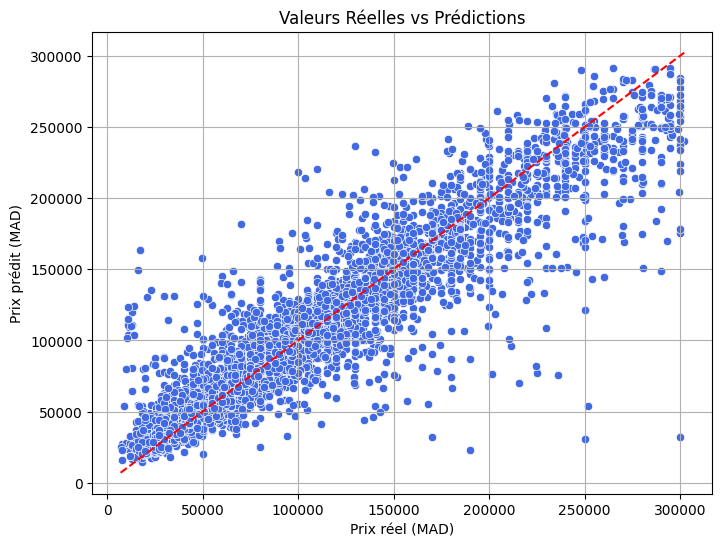

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que y_test et y_pred sont déjà disponibles
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # diagonale parfaite
plt.xlabel('Prix réel (MAD)')
plt.ylabel('Prix prédit (MAD)')
plt.title('Valeurs Réelles vs Prédictions')
plt.grid(True)
plt.show()


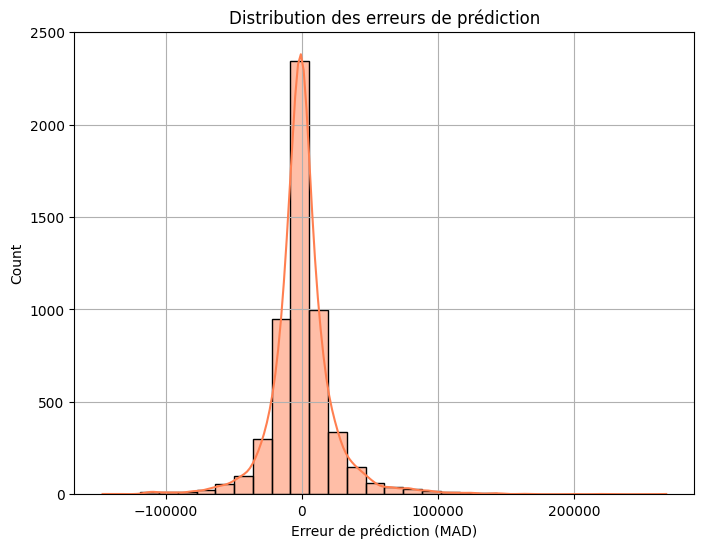

In [8]:
errors = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(errors, bins=30, kde=True, color='coral')
plt.xlabel('Erreur de prédiction (MAD)')
plt.title('Distribution des erreurs de prédiction')
plt.grid(True)
plt.show()


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np
# #
# # Séparation des données
# X = df.drop("Prix", axis=1)
# y = df["Prix"]

# # Standardisation
# numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
# scaler = StandardScaler()
# X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# # Split train/test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Modèle
# rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
# rf_model.fit(X_train, y_train)

# # Prédictions
# y_pred_rf = rf_model.predict(X_test)

# # Évaluation
# print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
# print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
# print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
# print("Random Forest R²:", r2_score(y_test, y_pred_rf))


Random Forest MAE: 17909.9848010424
Random Forest MSE: 768756803.322089
Random Forest RMSE: 27726.463952730952
Random Forest R²: 0.8167071488005623


In [ ]:
# from sklearn.tree import DecisionTreeRegressor

# # Modèle
# dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
# dt_model.fit(X_train, y_train)

# # Prédictions
# y_pred_dt = dt_model.predict(X_test)

# # Évaluation
# print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred_dt))
# print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
# print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
# print("Decision Tree R²:", r2_score(y_test, y_pred_dt))


Decision Tree MAE: 19967.453826155695
Decision Tree MSE: 988251549.060188
Decision Tree RMSE: 31436.46845719455
Decision Tree R²: 0.7643735400496869


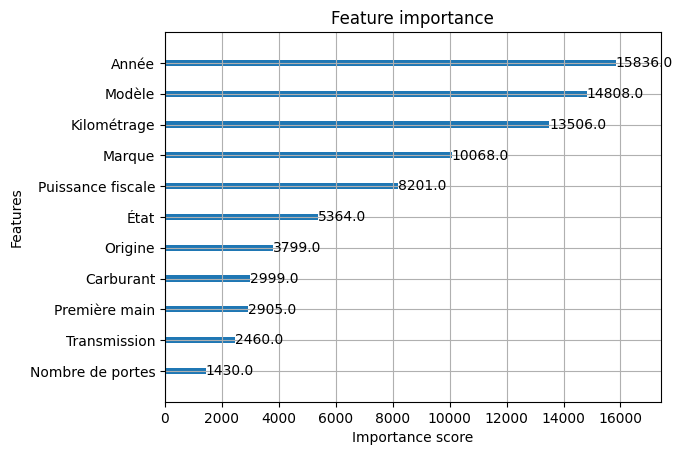

In [4]:
# Visualiser l'importance des features
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(best_model)
plt.show()


Corrélations avec 'Prix' :
                        Prix
Année              0.658594
Transmission      -0.565673
Carburant         -0.321768
Kilométrage       -0.099034
Marque             0.003134
Modèle             0.111262
Nombre de portes   0.060986
Origine            0.063858
Première main      0.319454
Puissance fiscale  0.108262
État               0.141442
Prix               1.000000


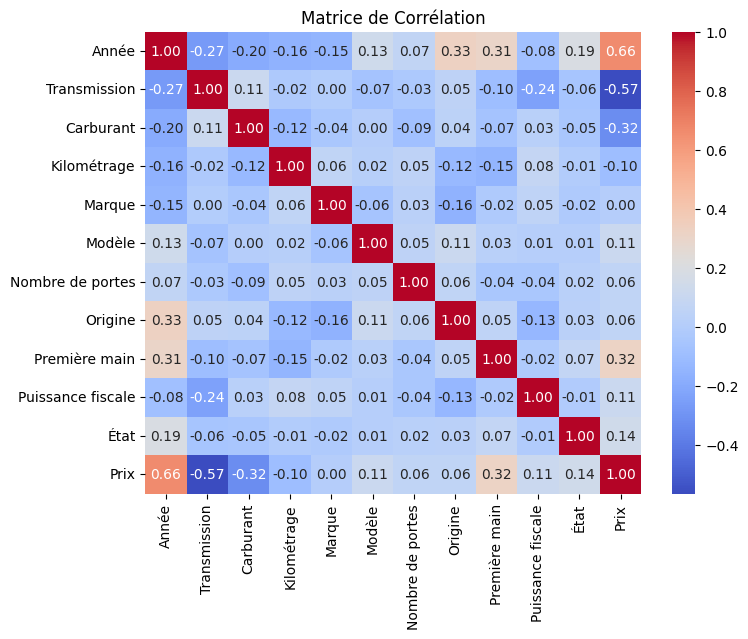

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# 2. Calcul de la matrice de corrélation
corr_matrix = df.corr()

# 3. Affichage de la corrélation entre 'Prix' et les autres features
# Extrait uniquement la colonne 'Prix' (et éventuellement la ligne pour avoir une vue symétrique)
prix_corr = corr_matrix[['Prix']]
print("Corrélations avec 'Prix' :\n", prix_corr)

# 4. Visualisation de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()


C:\Users\OUALIDALMOU\AppData\Local\Temp\ipykernel_11568\2459242964.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index, palette="coolwarm")


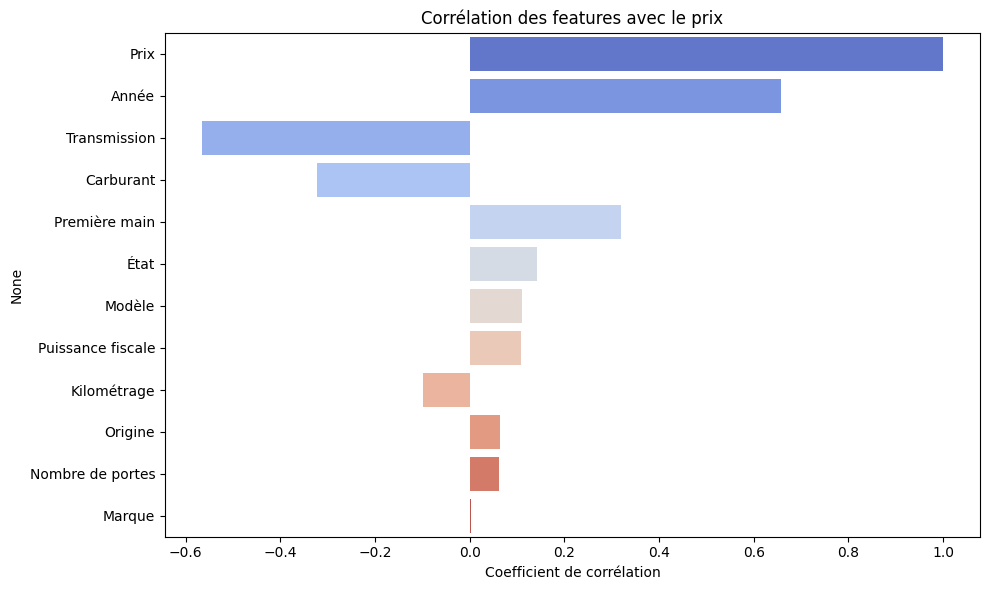

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Affichage des corrélations triées
correlation_with_price = df.corr(numeric_only=True)['Prix'].sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index, palette="coolwarm")
plt.title("Corrélation des features avec le prix")
plt.xlabel("Coefficient de corrélation")
plt.tight_layout()
plt.show()


In [5]:
import joblib

# Sauvegarde du modèle entraîné
joblib.dump(best_model, 'xgboost_modele_voiture2.pkl')
print("Modèle sauvegardé sous 'xgboost_modele_voiture2.pkl'")


Modèle sauvegardé sous 'xgboost_modele_voiture2.pkl'


In [6]:
# Sauvegarde du scaler
joblib.dump(scaler, 'scaler_voiture2.pkl')


['scaler_voiture2.pkl']